### Problem statement : Diamond Price Prediction Using XGBoost Regressor

#### Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

### Step 1:: Data Gathering

price: The price of the Diamond
    
carat: The carat value of the Diamond
    
cut: The cut type of the Diamond, it determines the shine
    
color: The color value of the Diamond
    
clarity: The carat type of the Diamond
    
depth: The depth value of the Diamond
    
table: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.
    
x: Width of the diamond
    
y: Length of the diamond
    
z: Height of the diamond

In [2]:
df=pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Learning/Diamond_Price_Prediction/diamonds_data.csv')
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Step 2:EDA - Read and Explore the Data

There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data

info() : This provides the summarized information of the data

describe() : This provides the descriptive statistical details of the data

nunique(): This helps us to identify if a column is categorical or continuous

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79
table,53940,NaN,NaN,NaN,57.4572,2.23449,43,56,57,59,95
price,53940,NaN,NaN,NaN,3932.8,3989.44,326,950,2401,5324.25,18823
x,53940,NaN,NaN,NaN,5.73116,1.12176,0,4.71,5.7,6.54,10.74
y,53940,NaN,NaN,NaN,5.73453,1.14213,0,4.72,5.71,6.54,58.9
z,53940,NaN,NaN,NaN,3.53873,0.705699,0,2.91,3.53,4.04,31.8


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

carat
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 1.

Based on the exploration ablove ,we can note down the observations.

price: Continuous. Selected. This is the Target Variable!

carat: Continuous. Selected.

cut: Categorical. Selected.

color: Categorical. Selected.

clarity: Categorical. Selected.

depth: Continuous. Selected.

table: Continuous. Selected.

x: Continuous. Selected.

y: Continuous. Selected.

z: Continuous. Selected.

#### Checking data for Outliers

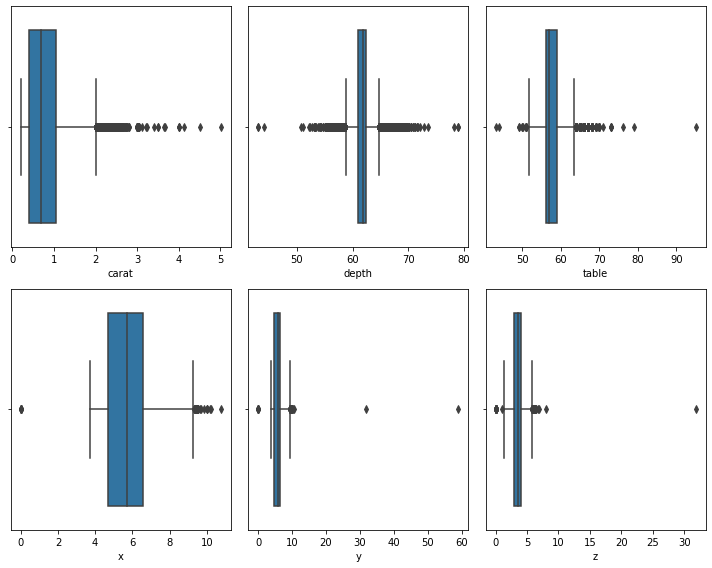

In [8]:
fig, axs = plt.subplots(2,3, figsize = (10,8))
plt1 = sns.boxplot(df['carat'], ax = axs[0,0]).set(xlabel= 'carat')
plt2 = sns.boxplot(df['depth'], ax = axs[0,1]).set(xlabel='depth')
plt3 = sns.boxplot(df['table'], ax = axs[0,2]).set(xlabel='table')
plt1 = sns.boxplot(df['x'], ax = axs[1,0]).set(xlabel='x')
plt2 = sns.boxplot(df['y'], ax = axs[1,1]).set(xlabel='y')
plt3 = sns.boxplot(df['z'], ax = axs[1,2]).set(xlabel='z')

plt.tight_layout()

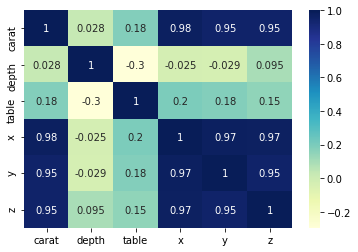

In [9]:
dataplot = sns.heatmap(df[['carat','depth','table','x','y','z']].corr(),cmap='YlGnBu',annot=True)
plt.show()

### Step 3: Train Test split

In [10]:
def train_test_split_features(df):
    y = df["price"]
    x = df.drop('price',axis=1)
    x=pd.get_dummies(x,dtype='int')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [11]:
x_train, x_test, y_train, y_test,features = train_test_split_features(df)

   carat  depth  table     x     y     z  cut_Fair  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0  3.95  3.98  2.43         0         0          1   
1   0.21   59.8   61.0  3.89  3.84  2.31         0         0          0   
2   0.23   56.9   65.0  4.05  4.07  2.31         0         1          0   
3   0.29   62.4   58.0  4.20  4.23  2.63         0         0          0   
4   0.31   63.3   58.0  4.34  4.35  2.75         0         1          0   

   cut_Premium  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0            0  ...        0        0           0           0            0   
1            1  ...        0        0           0           0            1   
2            0  ...        0        0           0           0            0   
3            1  ...        1        0           0           0            0   
4            0  ...        0        1           0           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0        

In [12]:
x_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
26250,1.63,61.7,55.0,7.56,7.60,4.68,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
31510,0.34,62.2,57.0,4.47,4.44,2.77,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
40698,0.40,61.7,56.0,4.73,4.77,2.93,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42634,0.58,62.1,55.0,5.38,5.35,3.33,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
47714,0.63,62.8,57.0,5.40,5.46,3.41,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Step 4 :: Fit and Evaluate Model

In [13]:
param_grid = [{'learning_rate': [0.1, 0.2, 0.3],
               'max_depth': [3,4,5],
               'subsample': [0.8, 0.9],
               'colsample_bytree': [0.8, 0.9],
               'n_estimators' : [50]}
             ]

In [14]:
model = XGBRegressor(random_state=0)
search = RandomizedSearchCV (estimator = model, param_distributions = param_grid, cv=5,n_iter=10, verbose=5,scoring = 'r2')
search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9; total time=   1.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.4s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.4s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.4s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

In [15]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.727043,0.458579,0.006251,0.007655,0.9,50,5,0.3,0.8,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.978603,0.979424,0.977103,0.980744,0.977595,0.978694,0.001303,1
7,0.550422,0.013183,0.006656,0.007361,0.9,50,5,0.2,0.9,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.977569,0.978529,0.977543,0.980187,0.976346,0.978035,0.001280,2
2,0.432523,0.001271,0.012498,0.011690,0.8,50,4,0.3,0.8,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.974920,0.976822,0.974889,0.976727,0.975159,0.975703,0.000880,3
3,0.438876,0.006364,0.009374,0.007654,0.8,50,4,0.2,0.8,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.973436,0.975393,0.972149,0.975217,0.973537,0.973946,0.001214,4
4,0.624882,0.054786,0.006251,0.007656,0.9,50,5,0.1,0.9,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.971131,0.972441,0.970529,0.974304,0.971357,0.971953,0.001328,5
9,0.370159,0.005023,0.006248,0.007652,0.9,50,3,0.3,0.8,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.969049,0.970953,0.968213,0.972373,0.970315,0.970181,0.001454,6
8,0.377714,0.006838,0.009372,0.007652,0.8,50,3,0.2,0.8,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.964371,0.966373,0.962791,0.966535,0.965317,0.965077,0.001385,7
6,0.458601,0.007688,0.003124,0.006249,0.8,50,4,0.1,0.9,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.962267,0.964163,0.961325,0.965875,0.964371,0.963600,0.001615,8
1,0.436673,0.008392,0.009372,0.007652,0.9,50,4,0.1,0.9,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.962712,0.963822,0.960477,0.965900,0.964053,0.963393,0.001782,9
5,0.370746,0.009157,0.009373,0.007653,0.8,50,3,0.1,0.8,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.945428,0.947993,0.942665,0.948352,0.950668,0.947021,0.002740,10


In [16]:
search.best_params_

{'subsample': 0.9,
 'n_estimators': 50,
 'max_depth': 5,
 'learning_rate': 0.3,
 'colsample_bytree': 0.8}

In [17]:
model = XGBRegressor(colsample_bytree= 0.9, learning_rate = 0.3, max_depth = 5, n_estimators = 50, subsample = 0.8)
model.fit(x_train, y_train)
xgb_predict = model.predict(x_test)

In [53]:
r2_score=metrics.r2_score(y_test,xgb_predict)
print('r2 score is :{}'.format(r2_score))
print('MAE =',mean_absolute_error(y_test, xgb_predict))
print('MSE =',mean_squared_error(y_test, xgb_predict))
print('RMS =',np.sqrt(mean_absolute_error(y_test,xgb_predict)))
print('mean_absolute_percentage_error =',mean_absolute_percentage_error(y_test, xgb_predict))

r2 score is :0.9785392330013398
MAE = 311.4587979965578
MSE = 340189.2183837986
RMS = 17.648195318404593
mean_absolute_percentage_error = 0.08846289838952989


### Step 5: Get important features

In [26]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

<BarContainer object of 26 artists>

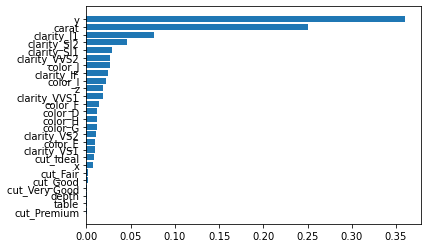

In [27]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)